## Welcome to the code presentation.





In [275]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
import scipy as stats
import seaborn as sns
sns.set()

%matplotlib inline



## Firstly we will be loading and reading the dataset from the folders using the pandas library

In [276]:
df = pd.read_csv ('kidney_disease.csv')
df


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


## The following slides go over gaining an understanding of the data 

## The Shape of the data tells us the rows and columns of the given dataset



In [277]:
df.shape

(400, 26)

In [278]:
#finding the sum of all the null values in each column
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

## Next we use the info method to figure out the data types 


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [280]:
pd.set_option('display.max_columns', 26)

###  The .describe() method splits each column with numerical values, into 8 attributes. 
### Count, Mean, Std (Standard Deviation), Minimum, 25%, 50%, 75%, Maximum

In [281]:
# .describe(): DataFrame -> DataFrameObject
df.describe()


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## The .corr() method provides a correlation between each of the columns 

In [282]:
#.corr(): DataFrame -> DataFrame
# shows the relationships between columns
df.corr()


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


### Let's try the same thing but by adding some colors

###### If the following graph isn't showing completely, you may check it completely in the prezi

AxesSubplot(0.125,0.125;0.62x0.755)


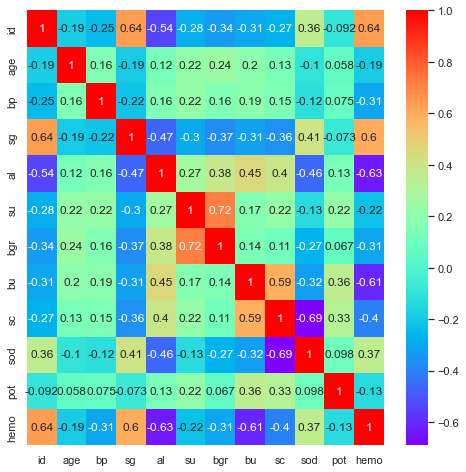

In [283]:
sns.set(font_scale= 1)
plt.figure(figsize = (8,8))
with_colors_and_annotation=sns.heatmap(df.corr(), annot=True, cmap = 'rainbow')
print(with_colors_and_annotation)

### As you can see, when the values are positively related they become more red and when they are negatively correlated, they turn more purple. 
### Since most of the values are not too related to each other, they are green.

## Now we move to cleaning the data

### Usually these columns have a certain 'weird' values as sometimes values are not inputed properly. It is important to change them to properly train our machine learning model. Lets take a look at one of the columns with such values

In [284]:
# identifying unique values
set(df["age"].tolist())

{nan,
 nan,
 nan,
 nan,
 nan,
 2.0,
 3.0,
 5.0,
 nan,
 4.0,
 6.0,
 7.0,
 8.0,
 11.0,
 12.0,
 14.0,
 15.0,
 17.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 nan,
 32.0,
 nan,
 33.0,
 34.0,
 35.0,
 36.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 90.0,
 nan,
 37.0}

### If you were able to closely observe there were a lot of 'nan' values. These stand for Not A Number. They represent missing values in the dataset. 


### First lets begin by using SimpleImputer, a tool to change all the nan values into the most frequent (mode) value. It is important that we use the mode because it does not affect statistical analysis

In [285]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns = df.columns
df_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,135.0,3.5,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,99.0,18.0,0.8,135.0,3.5,11.3,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,135.0,3.5,9.6,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,135.0,3.5,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


### Lets re-run the code where we saw the nan values

In [286]:

set(df_imputed["age"].tolist())

{2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 11.0,
 12.0,
 14.0,
 15.0,
 17.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 90.0}

### Weird values such as 'ckd\t' are also present, lets fix the weird values

In [287]:
set(df["classification"].tolist())

{'ckd', 'ckd\t', 'notckd'}

### We will be using the same logic while fixing the weird values, replace them with either the most frequent ones or themselves without \t

### Firstly lets find the most frequent values of the columns with numerical values and weird values

In [288]:
print(df_imputed["rc"].mode())
print(df_imputed["wc"].mode())
print(df_imputed["pcv"].mode())

0    5.2
Name: rc, dtype: object
0    9800
Name: wc, dtype: object
0    41
Name: pcv, dtype: object


In [289]:
#writing lambda functions to fix weird values

df_imputed["classification"]=df_imputed["classification"].apply(lambda x: 'ckd' if x=="ckd\t" else x)

df_imputed["cad"]=df_imputed["cad"].apply(lambda x: 'no' if x=="\tno" else x)

df_imputed["dm"]=df_imputed["dm"].apply(lambda x: 'no' if x=="\tno" else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x: 'yes' if x=="\tyes" else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x: 'yes' if x==' yes' else x)

df_imputed["rc"]=df_imputed["rc"].apply(lambda x: '5.2' if x=='\t?' else x)

df_imputed["wc"]=df_imputed["wc"].apply(lambda x: '9800' if x=='\t6200' else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x: '9800' if x=='\t8400' else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x: '9800' if x=='\t?' else x)

df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x: '41' if x=='\t43' else x)
df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x: '41' if x=='\t?' else x)



### And again lets print out all the values.
#### Note: the output shows a 0 and 1, which means now there are only two outputs. 'ckd' and 'notckd'. 'ckd\t' is no longer present

In [290]:
set(df_imputed["classification"].tolist())

{'ckd', 'notckd'}

### There, we have successfully parsed and filtered through the data. Lets try to figure out some information now

In [291]:
df_class_values = df_imputed['classification'].value_counts()
df_class_values

ckd       250
notckd    150
Name: classification, dtype: int64

### lets try to visualize this data via  plot

<AxesSubplot:title={'center':'Diagnosis of Kidney Disease in 400 Patients'}>

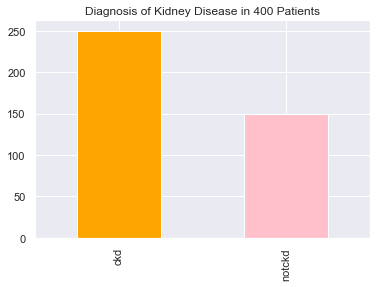

In [292]:
df_class_values.plot(kind='bar', color=['orange', 'pink'], title = 'Diagnosis of Kidney Disease in 400 Patients')

### Now, lets look at the age distribution of the data

<AxesSubplot:title={'center':'Age Distribution of Chronic Kidney Disease'}, ylabel='Frequency'>

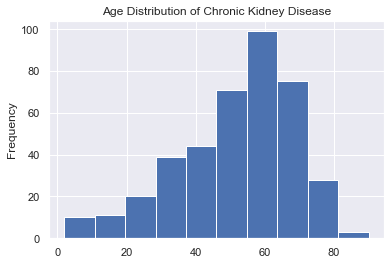

In [293]:
df_imputed['age'].plot(kind='hist', title = 'Age Distribution of Chronic Kidney Disease')

### As we can see, Chronic Kidney disease is most frequent from the ages of 55-65.

#### Now lets try to find out the distribution of blood pressure acrosss all 400 patients

#### We can infer the distribution of blood pressure of the patients in the dataset (left graph) and on the right we can see some outliers (dots)
###### (ignore the text in the red box)

C:\Users\mihir\OneDrive\Documents\Anaconda4Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


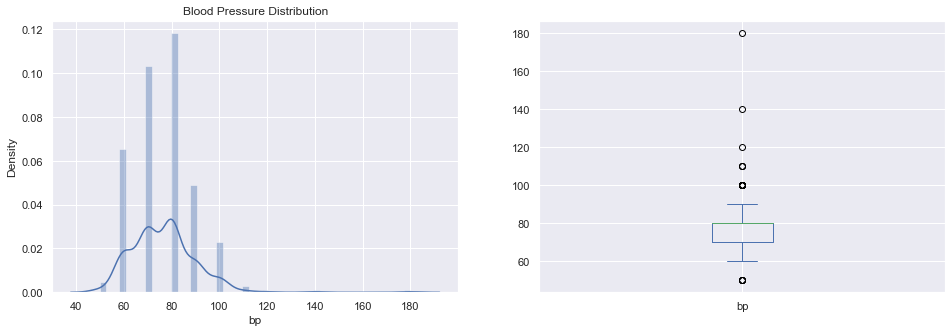

In [294]:
plt.subplot(121), sns.distplot(df_imputed['bp']), plt.title("Blood Pressure Distribution")
plt.subplot(122), df['bp'].plot.box(figsize=(16,5))
plt.show()

### We know, computers work with numbers a lot better than words. Its important that our data be easy for the model to compute with. Our data is neatly either something or not it. It would be better if we can make it either a 0 or a 1. 

In [295]:
df_imputed['classification'] = df_imputed['classification'].map({'ckd':1,'notckd':0})
df_imputed['htn'] = df_imputed['htn'].map({'yes':1,'no':0})
df_imputed['dm'] = df_imputed['dm'].map({'yes':1,'no':0})
df_imputed['cad'] = df_imputed['cad'].map({'yes':1,'no':0})
df_imputed['appet'] = df_imputed['appet'].map({'good':1,'poor':0})
df_imputed['ane'] = df_imputed['ane'].map({'yes':1,'no':0})
df_imputed['pe'] = df_imputed['pe'].map({'yes':1,'no':0})
df_imputed['ba'] = df_imputed['ba'].map({'present':1,'notpresent':0})
df_imputed['pcc'] = df_imputed['pcc'].map({'present':1,'notpresent':0})
df_imputed['pc'] = df_imputed['pc'].map({'abnormal':1,'normal':0})
df_imputed['rbc'] = df_imputed['rbc'].map({'abnormal':1,'normal':0})
df_imputed['classification'].value_counts()



1    250
0    150
Name: classification, dtype: int64

### Lets look at the correlation again after cleaning the data

###### If the following graph isn't showing completely, you may check it completely in the prezi

<AxesSubplot:>

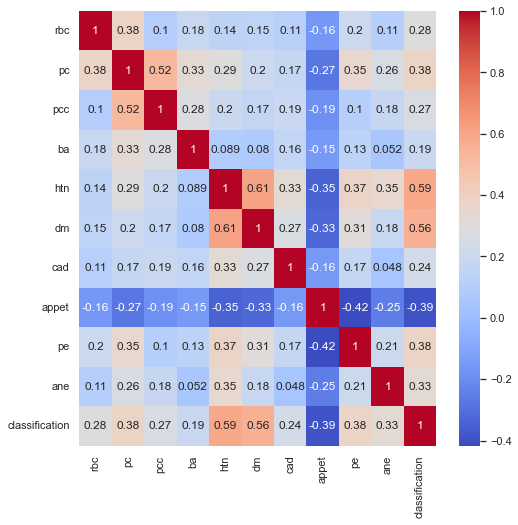

In [296]:
sns.set(font_scale= 1)
plt.figure(figsize = (8,8))
sns.heatmap(df_imputed.corr(), annot = True, cmap = 'coolwarm')


### Rechecking the shape, columns of data

In [297]:
df_imputed.shape


(400, 26)

In [298]:
df_imputed.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

### Remember when I said we'll get back to the null values. It's important to touch upon it before we begin our machine learning model



### At that time, we had a few options. Keeping the null values and dropping them (deleting). But what we ended up doing was actually convert them into numerical values, making it easier for our machine learning model to conduct its analysis. The problem with dropping them is we decrease the data we provide to the model, hence making it a lot more inaccurate. It is imperative to maintain accuracy as this model PREDICTS disease.

### Something else to keep in mind is when we work on healthcare projects we need to make sure that the model evaluation should have the least false positive errors. (The test shows the disease is present, when in reality, it isnt)

## Here we have reached the end of the processing phase, now we we have to make the model

# We will be using Logistic Regression 

# Logistic Regression is a statistical analysis tool that has an independent variable X and dependent variable Y

## In our case, the X value are all the columns holding the features and Y value the classification column which actually concludes whether ckd exists or not

## The reason we use logistic regression over other models is because it is used when we have a binary output. Either is or is not. Here that is 'has ckd' or 'does not have ckd' 

## Here we have define our X and Y values and divided the machine learning model into two parts. Train and Test. We can test and train this data on a simple command

In [299]:
from sklearn.linear_model import LogisticRegression

X = df_imputed.iloc[:,:-1]
y = df_imputed['classification']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [300]:
y_pred = logreg.predict(X_test)

In [301]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.99


### LOGISTIC REGRESSION HAS AN ACCURACY OF 0.99 AND WAS ABLE TO ACCURATELY PREDICT ALL THE GIVEN CASES

### There we go, the machine learning model was able to successfully run using the data we supplied. Now lets check the overall performance

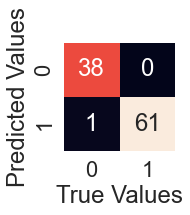

In [302]:
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=2)
def plot_conf_mat(y_test,y_preds):
    """
    This function will be heloing in plotting the confusion matrix by using seaborn
    """
    
    fig,ax=plt.subplots(figsize=(2,2))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")

log_pred = logreg.predict(X_test)
plot_conf_mat(y_test, log_pred)

### Introducing the Confusion Matrix. A table that encapsulates the performance of our regression model. 

### Evaluating the confusion matrix, we can see that the model has identified 38% of the patients to not have ckd, 61% to have ckd. The 1 in the black square means that 1% of patients has wrongly been identified as not having ckd False Negative! While the 0 shows that there are no False Positives!  

## So there we go, the end of the machine learning model where we cleaned and processed the data, and predicted a 99% with the given data. You may now return to the Presentation